In [2]:
#Import Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib # This line is added to import the main matplotlib module
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plots we will create

#Read in the data

df = pd.read_csv(r'C:\Users\elish\Downloads\movies.csv')

In [6]:
#Inspect the Movies Dataset
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
#Data Cleaning

import pandas as pd

for column in ["company", "country", "star", "writer", "released", "rating"]:
    # Check if the column has missing values
    if df[column].isnull().any():
        # Handle missing values based on column type
        if pd.api.types.is_numeric_dtype(df[column]):
            # Fill missing values in numeric columns with the mean
            df[column] = df[column].fillna(df[column].mean())
        else:
            # Fill missing values in categorical columns with the mode or "Unknown"
            if df[column].mode().empty:
                # If no mode exists (e.g., all values are unique), use "Unknown"
                df[column] = df[column].fillna("Unknown")
            else:
                # Fill with the mode (most frequent value)
                df[column] = df[column].fillna(df[column].mode()[0])

In [9]:
#Create correct Year column

df["yearcorrect"] = df["released"].astype(str).str[:4]
df.head()

In [11]:
#Sorting Data

df.sort_values(by=['gross'], inplace=False, ascending=False).head()
pd.set_option("display.max_row", None)

In [12]:
#Drop any duplicates

df["company"].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

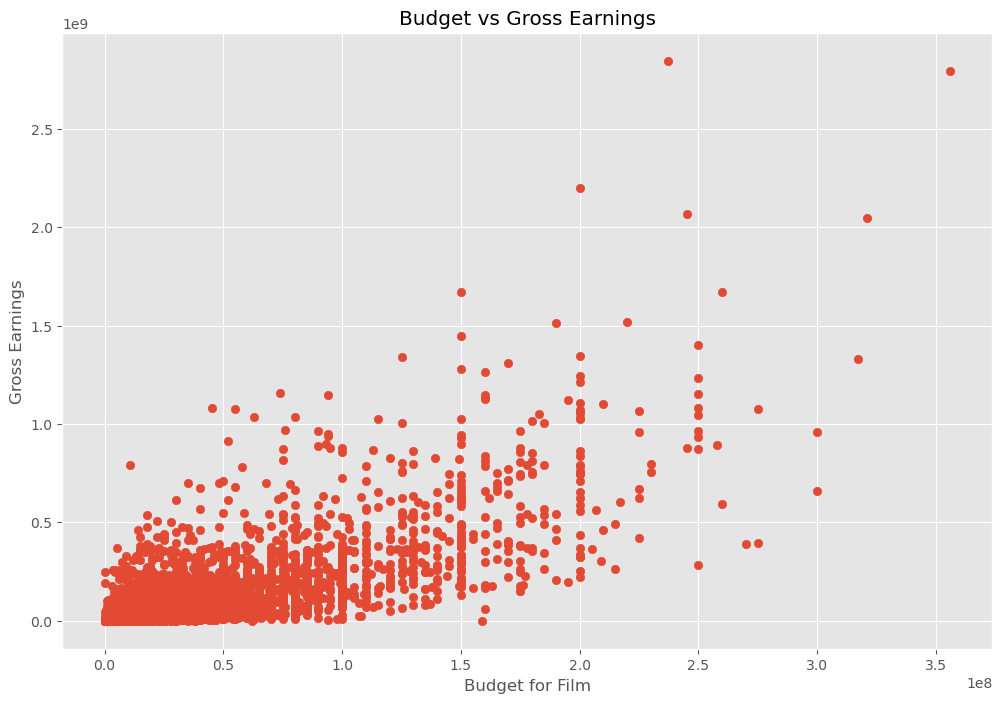

In [13]:
#Create a scatter plot with budget vs Gross

plt.scatter(x=df["budget"], y=df["gross"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget for Film")
plt.ylabel("Gross Earnings")
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

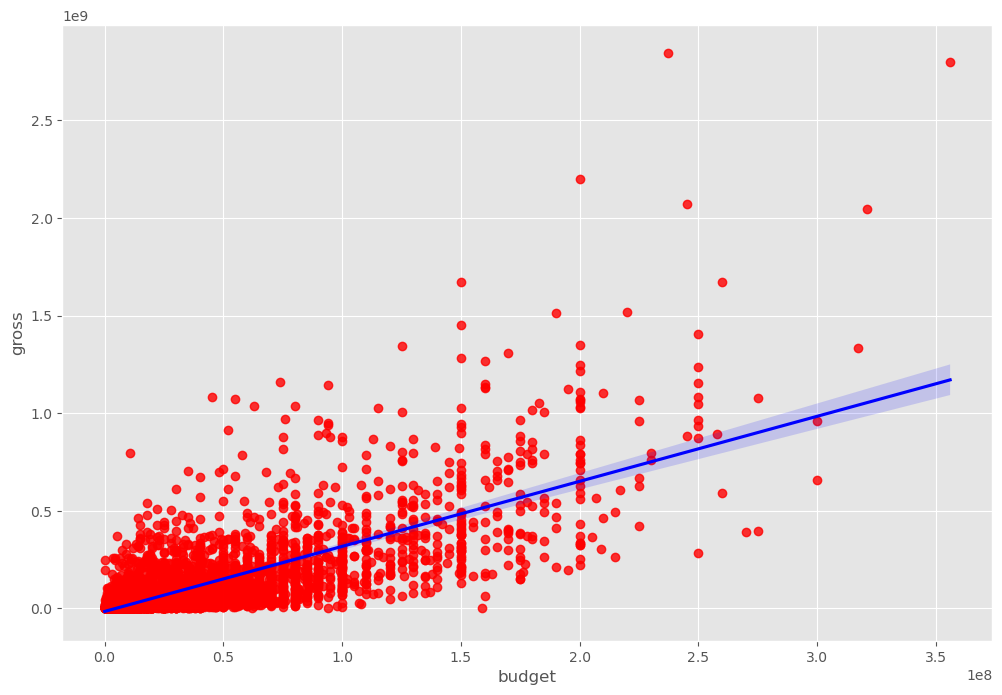

In [14]:
#Plot budget vs gross using seaborn

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [15]:
#Correlation Matrix

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr(method='pearson')

corr_matrix.head()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216


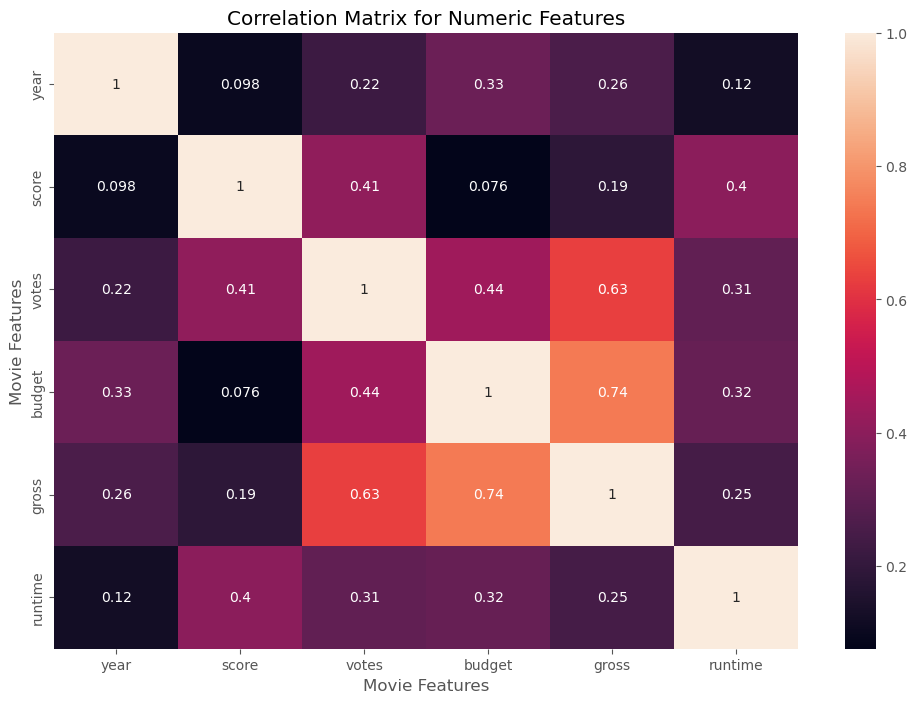

In [16]:
#Correlation Matrix Visualisation

corr_matrix = numeric_df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [17]:
#Correlation Matrix of Company Numeric Values

corr_matix = numeric_df.corr(method='pearson')

corr_pairs = corr_matix.unstack()
corr_pairs

year     year       1.000000
         score      0.097995
         votes      0.222945
         budget     0.329321
         gross      0.257486
         runtime    0.120811
score    year       0.097995
         score      1.000000
         votes      0.409182
         budget     0.076254
         gross      0.186258
         runtime    0.399451
votes    year       0.222945
         score      0.409182
         votes      1.000000
         budget     0.442429
         gross      0.630757
         runtime    0.309212
budget   year       0.329321
         score      0.076254
         votes      0.442429
         budget     1.000000
         gross      0.740395
         runtime    0.320447
gross    year       0.257486
         score      0.186258
         votes      0.630757
         budget     0.740395
         gross      1.000000
         runtime    0.245216
runtime  year       0.120811
         score      0.399451
         votes      0.309212
         budget     0.320447
         gross